# Job Placement Prediction using Logistic Regression
This project predicts the chances of getting a job based on academic performance and skills.
Dataset: `placement.csv`

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:

# Load dataset
df = pd.read_csv("placement.csv")
df.head()


,tenth_percent,twelfth_percent,degree_percent,specialization,skills_count,english_score,job_offer
0,88,56,62,ENTC,7,5,0
1,78,93,57,Mech,2,5,1
2,64,57,57,ENTC,5,7,1
3,92,84,55,CS,6,6,1
4,57,63,81,Mech,2,9,0


In [5]:

# Check dataset info
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tenth_percent    50 non-null     int64 
 1   twelfth_percent  50 non-null     int64 
 2   degree_percent   50 non-null     int64 
 3   specialization   50 non-null     object
 4   skills_count     50 non-null     int64 
 5   english_score    50 non-null     int64 
 6   job_offer        50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


,tenth_percent,twelfth_percent,degree_percent,skills_count,english_score,job_offer
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,71.760000,71.440000,66.820000,5.180000,6.680000,0.580000
std,12.846917,13.889006,9.255313,2.488258,1.284762,0.498569
min,51.000000,50.000000,55.000000,2.000000,5.000000,0.000000
25%,61.500000,59.250000,59.000000,3.000000,5.250000,0.000000
50%,71.500000,71.000000,64.000000,5.000000,7.000000,1.000000
75%,81.250000,83.750000,76.750000,7.000000,8.000000,1.000000
max,93.000000,94.000000,84.000000,9.000000,9.000000,1.000000


In [6]:

# Encode categorical columns
le = LabelEncoder()
df['specialization'] = le.fit_transform(df['specialization'])

# Split features and target
X = df.drop(columns=['job_offer'])
y = df['job_offer']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.60      0.50      0.55         6

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.52      0.50      0.51        10



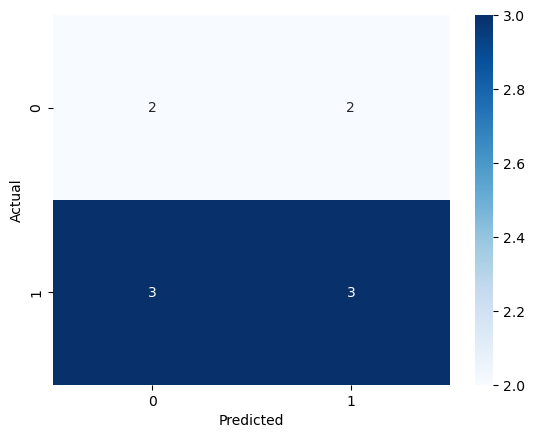

In [7]:

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:

# Predict for a new student example
sample = [[83.8, 71.69, 62, 2, 5, 8]]  # 10th%, 12th%, degree%, specialization, skills, english_score
print("Prediction (0=No Job, 1=Job):", model.predict(sample))
print("Job Chances Probability:", model.predict_proba(sample))


Prediction (0=No Job, 1=Job): [1]
Job Chances Probability: [[0. 1.]]
